<a href="https://colab.research.google.com/github/saathwikad/WeatherPrediction/blob/main/WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [4]:
!pip install -q kaggle


In [5]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saathwikad","key":"9f34a23c7ffbcc82134f84f9309e71ad"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [7]:
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

 92% 78.0M/84.7M [00:00<00:00, 178MB/s]
100% 84.7M/84.7M [00:00<00:00, 181MB/s]


In [10]:
!unzip /content/climate-change-earth-surface-temperature-data.zip -d /content/climate-change-earth-surface-temperature-data

Archive:  /content/climate-change-earth-surface-temperature-data.zip
  inflating: /content/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv  
  inflating: /content/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv  
  inflating: /content/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv  
  inflating: /content/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv  
  inflating: /content/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv  


In [11]:
data = pd.read_csv('/content/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv')

In [12]:
city_data = data.drop_duplicates(['City'])

In [13]:
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E


In [17]:
from geopy.geocoders import Photon

In [18]:
LAT = []
LONG = []
for city in city_data.City.tolist():
    locator = Photon(user_agent="myGeocoder")
    location = locator.geocode(city)
    LAT.append(location.latitude)
    LONG.append(location.longitude)



In [21]:
from geopy.geocoders import Nominatim

world_map= folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
        lat = city_data.iloc[i]['Latitude'][:-1]
        long = city_data.iloc[i]['Longitude'][:-1]
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True, color='darkred',fill_color='darkred').add_to(marker_cluster)

([<matplotlib.patches.Wedge at 0x7927757ff9a0>,
 [Text(-1.0950344628649946, 0.10440079088767877, 'Non NaN elements'),
  Text(1.3936802176892007, -0.132873815410646, 'NaN elements')])

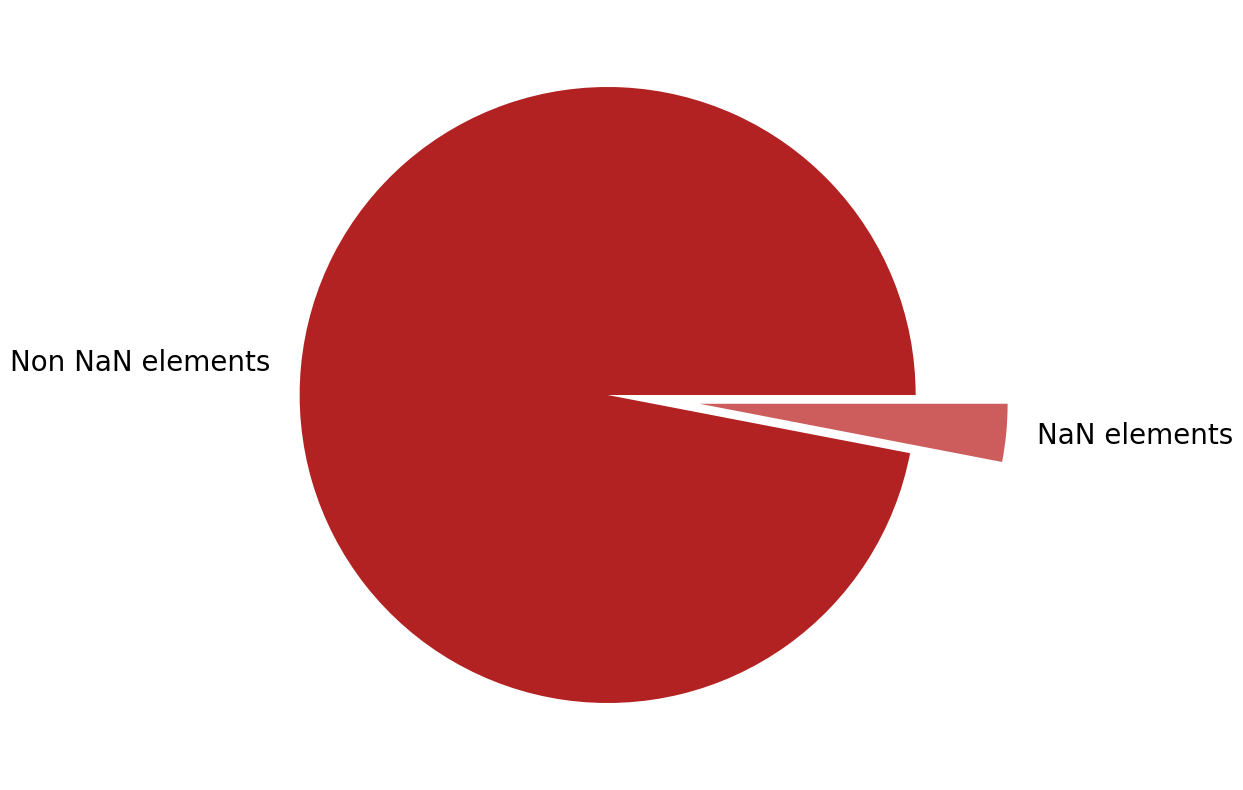

In [22]:
explodes = (0,0.3)
plt.pie(data[data['City']=='Chicago'].AverageTemperature.isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [23]:
chicago_data = data[data['City']=='Chicago']

In [24]:
chicago_data['AverageTemperature']=chicago_data.AverageTemperature.fillna(method='bfill')

<ipython-input-24-84f2fdaf2630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_data['AverageTemperature']=chicago_data.AverageTemperature.fillna(method='bfill')


In [25]:
chicago_data['AverageTemperatureUncertainty']=chicago_data.AverageTemperatureUncertainty.fillna(method='bfill')

<ipython-input-25-78f8cd0627c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_data['AverageTemperatureUncertainty']=chicago_data.AverageTemperatureUncertainty.fillna(method='bfill')


In [26]:
chicago_data = chicago_data.reset_index()

In [27]:
chicago_data = chicago_data.drop(columns=['index'])

In [28]:
chicago_data.dt = pd.to_datetime(chicago_data.dt)

In [29]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(chicago_data)):
    WEEKDAY.append(chicago_data.dt[i].weekday())
    DAY.append(chicago_data.dt[i].day)
    MONTH.append(chicago_data.dt[i].month)
    YEAR.append(chicago_data.dt[i].year)

In [30]:
chicago_data['Year'] = YEAR
chicago_data['Month'] = MONTH
chicago_data['Day'] = DAY
chicago_data['Weekday'] = WEEKDAY

In [31]:
change_year_index = []
change_year = []
year_list = chicago_data['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)

In [32]:
chicago_data.loc[change_year_index].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
2,1744-01-01,8.766,2.357,Chicago,United States,42.59N,87.27W,1744,1,1,2
14,1745-01-01,-0.901,2.649,Chicago,United States,42.59N,87.27W,1745,1,1,4
26,1746-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1746,1,1,5
38,1747-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1747,1,1,6
50,1748-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1748,1,1,0


In [33]:
x_ticks_year_list=np.linspace(min(year_list),max(year_list),10).astype(int)
change_year_index = np.array(change_year_index)
x_ticks_year_index = []
for i in range(1,len(x_ticks_year_list)):
    x_ticks_year_index.append(change_year_index[np.where(np.array(change_year)==x_ticks_year_list[i])][0])

Text(0, 0.5, 'Average Temperature')

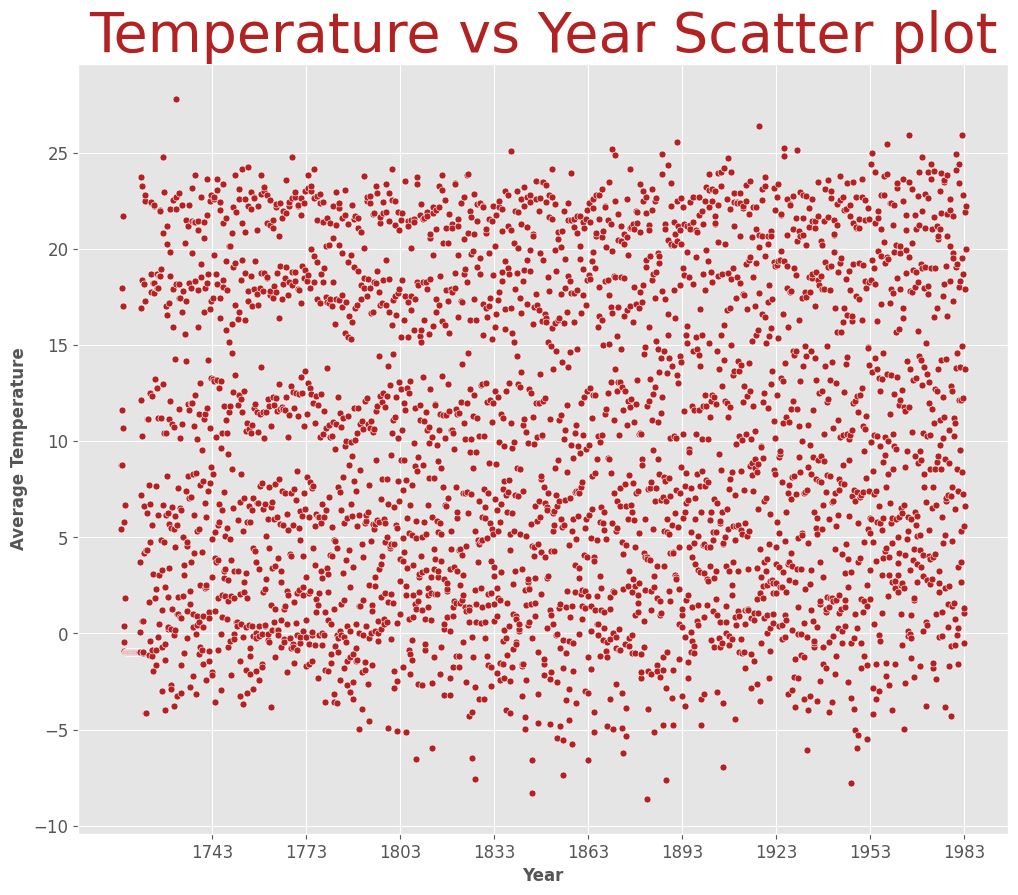

In [35]:
sns.scatterplot(x=chicago_data.index,y=chicago_data.AverageTemperature,s=25,color='firebrick')
plt.xticks(x_ticks_year_index,x_ticks_year_list[:-1])
plt.title('Temperature vs Year Scatter plot',color='firebrick',fontsize=40)
plt.xlabel('Year')
plt.ylabel('Average Temperature')

In [44]:
last_year_data = chicago_data[chicago_data.Year>=2010].reset_index().drop(columns=['index'])
P = np.linspace(0,len(last_year_data)-1,5).astype(int)

In [45]:
def get_timeseries(start_year,end_year):
    last_year_data = chicago_data[(chicago_data.Year>=start_year) & (chicago_data.Year<=end_year)].reset_index().drop(columns=['index'])
    return last_year_data

In [46]:
def plot_timeseries(start_year,end_year):
    last_year_data = get_timeseries(start_year,end_year)
    P = np.linspace(0,len(last_year_data)-1,5).astype(int)
    plt.plot(last_year_data.AverageTemperature,marker='.',color='firebrick')
    plt.xticks(np.arange(0,len(last_year_data),1)[P],last_year_data.dt.loc[P],rotation=60)
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

In [47]:
def plot_from_data(data,time,c='firebrick',with_ticks=True,label=None):
    time = time.tolist()
    data = np.array(data.tolist())
    P = np.linspace(0,len(data)-1,5).astype(int)
    time = np.array(time)
    if label==None:
        plt.plot(data,marker='.',color=c)
    else:
        plt.plot(data,marker='.',color=c,label=label)
    if with_ticks==True:
        plt.xticks(np.arange(0,len(data),1)[P],time[P],rotation=60)
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

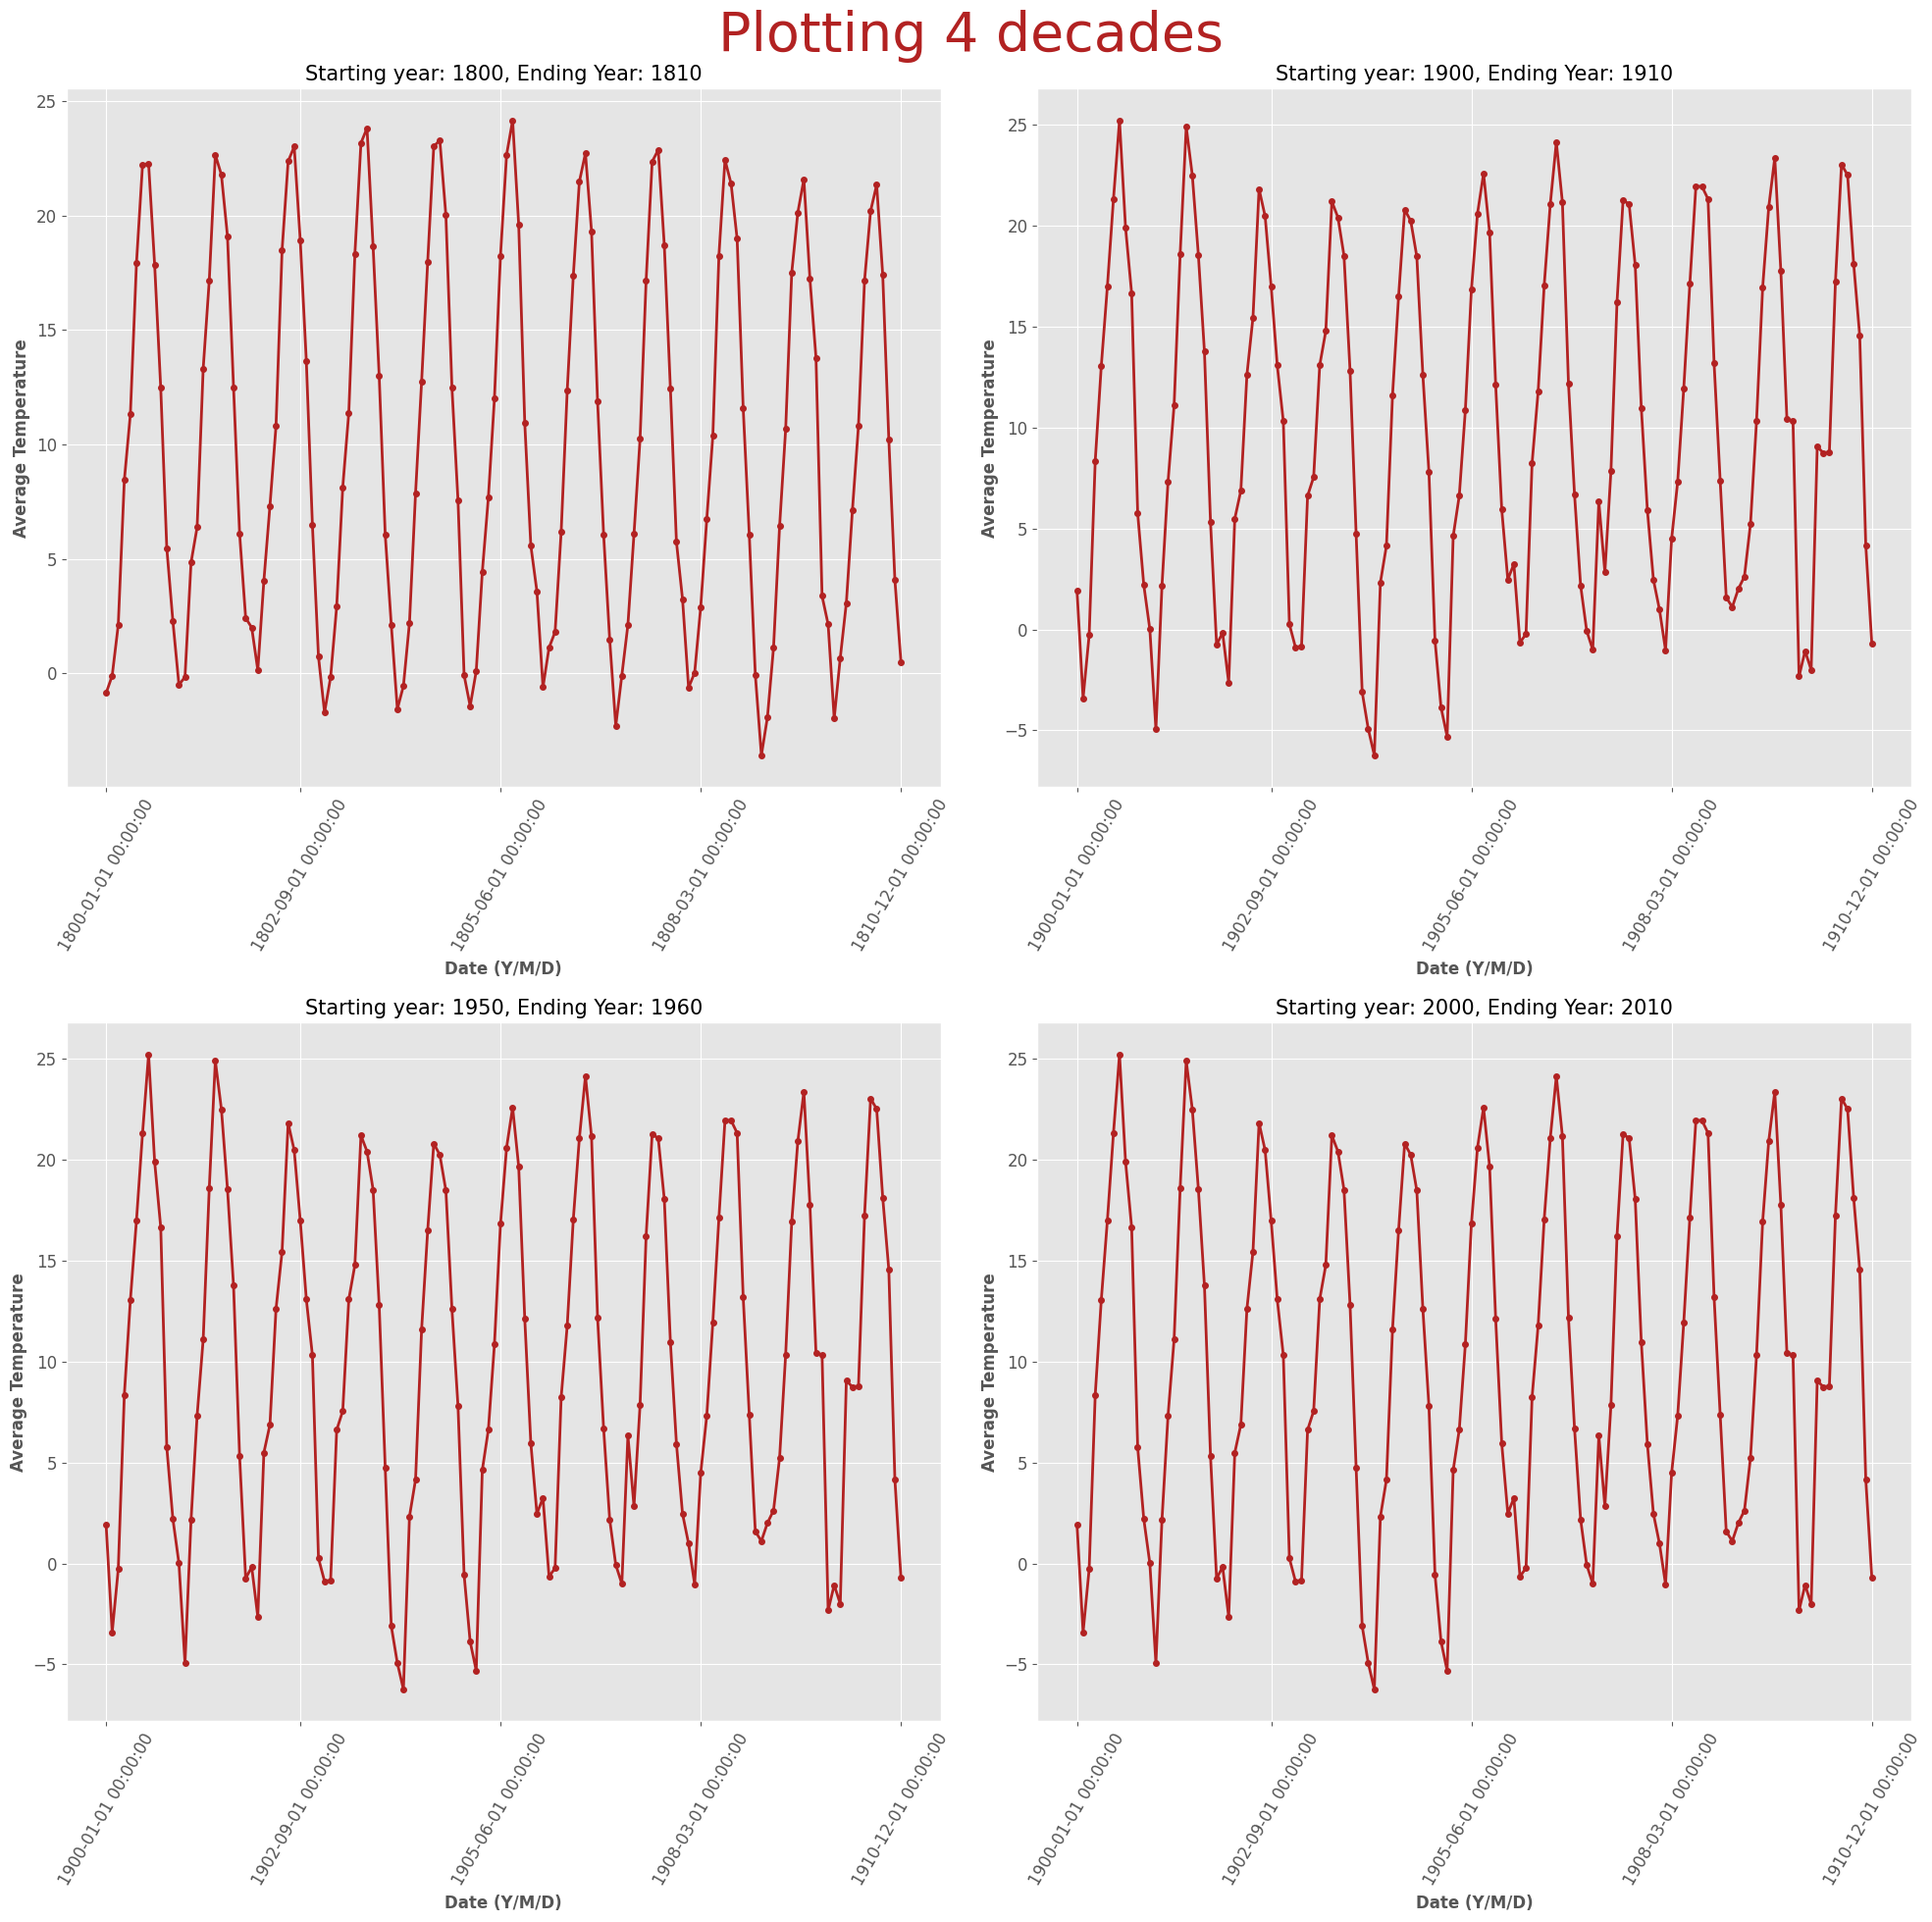

In [48]:
plt.figure(figsize=(20,20))
plt.suptitle('Plotting 4 decades',fontsize=40,color='firebrick')

plt.subplot(2,2,1)
plt.title('Starting year: 1800, Ending Year: 1810',fontsize=15)
plot_timeseries(1800,1810)
plt.subplot(2,2,2)
plt.title('Starting year: 1900, Ending Year: 1910',fontsize=15)
plot_timeseries(1900,1910)
plt.subplot(2,2,3)
plt.title('Starting year: 1950, Ending Year: 1960',fontsize=15)
plot_timeseries(1900,1910)
plt.subplot(2,2,4)
plt.title('Starting year: 2000, Ending Year: 2010',fontsize=15)
plot_timeseries(1900,1910)
plt.tight_layout()

<ipython-input-49-feddc0648f82>:6: RuntimeWarning: divide by zero encountered in divide
  new_X = 1/new_X


(2.0, 22.0)

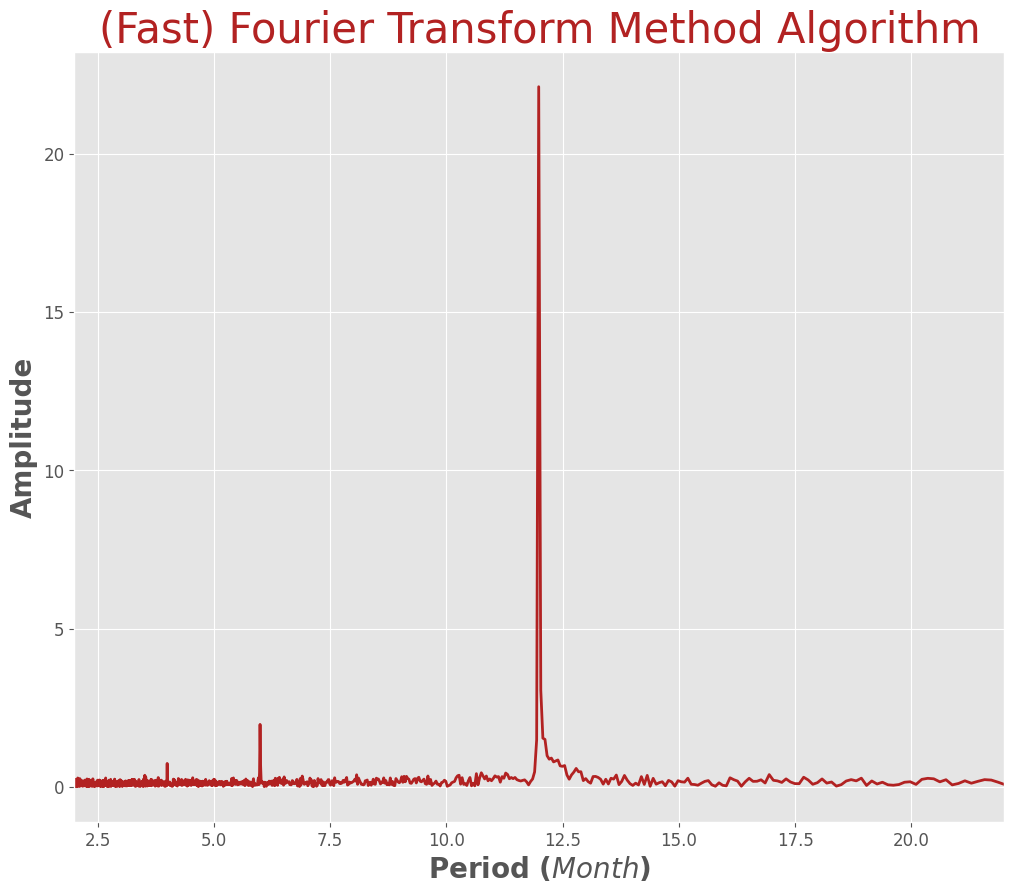

In [49]:
FFT = np.fft.fft(chicago_data.AverageTemperature)
FFT_abs = np.abs(FFT)
new_N=int(len(FFT)/2)
f_nat=1
new_X = np.linspace(0, f_nat/2, new_N, endpoint=True)
new_X = 1/new_X
plt.plot(new_X,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_X),color='firebrick')
plt.xlabel('Period ($Month$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=30,color='firebrick')
plt.grid(True)
plt.xlim(2,22)

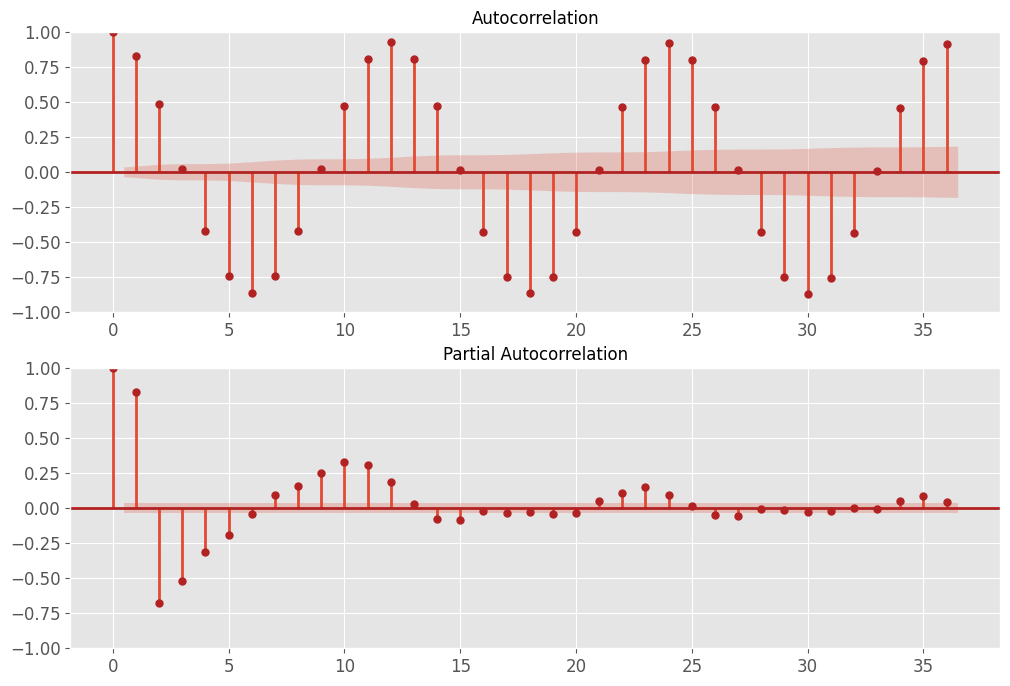

In [50]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(chicago_data.AverageTemperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(chicago_data.AverageTemperature, ax=ax2,color='firebrick')

In [51]:
result = adfuller(chicago_data.AverageTemperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -6.029493829973597
p-value: 1.4292530979861284e-07
Critical Values:
	1%: -3.4323875260668344
	5%: -2.862440255934873
	10%: -2.5672492261933377


In [52]:
result = adfuller(chicago_data.AverageTemperature[0:120])
print('ADF Statistic on the first decade: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the first decade: -2.096122487386039
p-value: 0.2460766247103489
Critical Values:
	1%: -3.4901313156261384
	5%: -2.8877122815688776
	10%: -2.5807296460459184


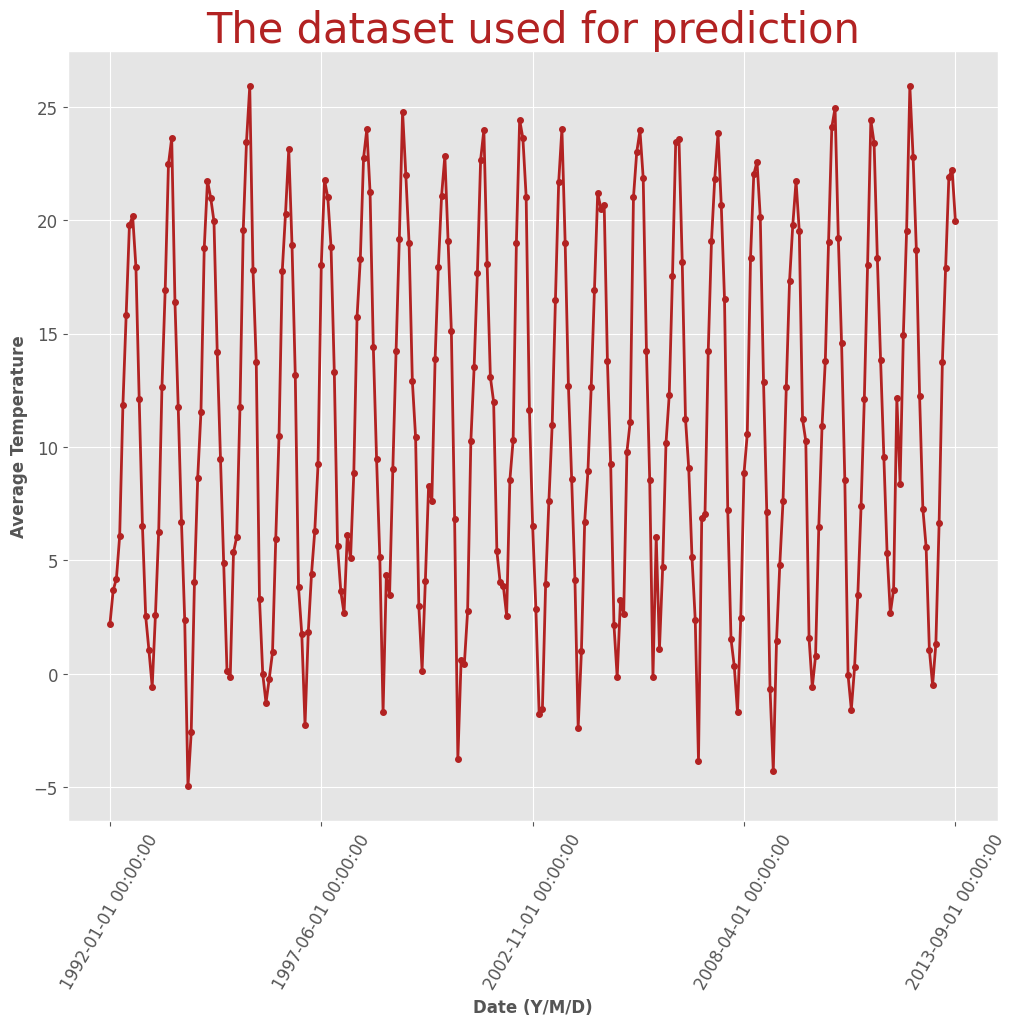

In [53]:
plt.title('The dataset used for prediction', fontsize=30,color='firebrick')
plot_timeseries(1992,2013)

In [54]:
temp = get_timeseries(1992,2013)
N = len(temp.AverageTemperature)
split = 0.95
training_size = round(split*N)
test_size = round((1-split)*N)
series = temp.AverageTemperature[:training_size]
date = temp.dt[:training_size]
test_series = temp.AverageTemperature[len(date)-1:len(temp)]
test_date = temp.dt[len(date)-1:len(temp)]
#test_date = test_date.reset_index().dt
#test_series = test_series.reset_index().AverageTemperature

In [55]:
test_date

247   2012-08-01
248   2012-09-01
249   2012-10-01
250   2012-11-01
251   2012-12-01
252   2013-01-01
253   2013-02-01
254   2013-03-01
255   2013-04-01
256   2013-05-01
257   2013-06-01
258   2013-07-01
259   2013-08-01
260   2013-09-01
Name: dt, dtype: datetime64[ns]

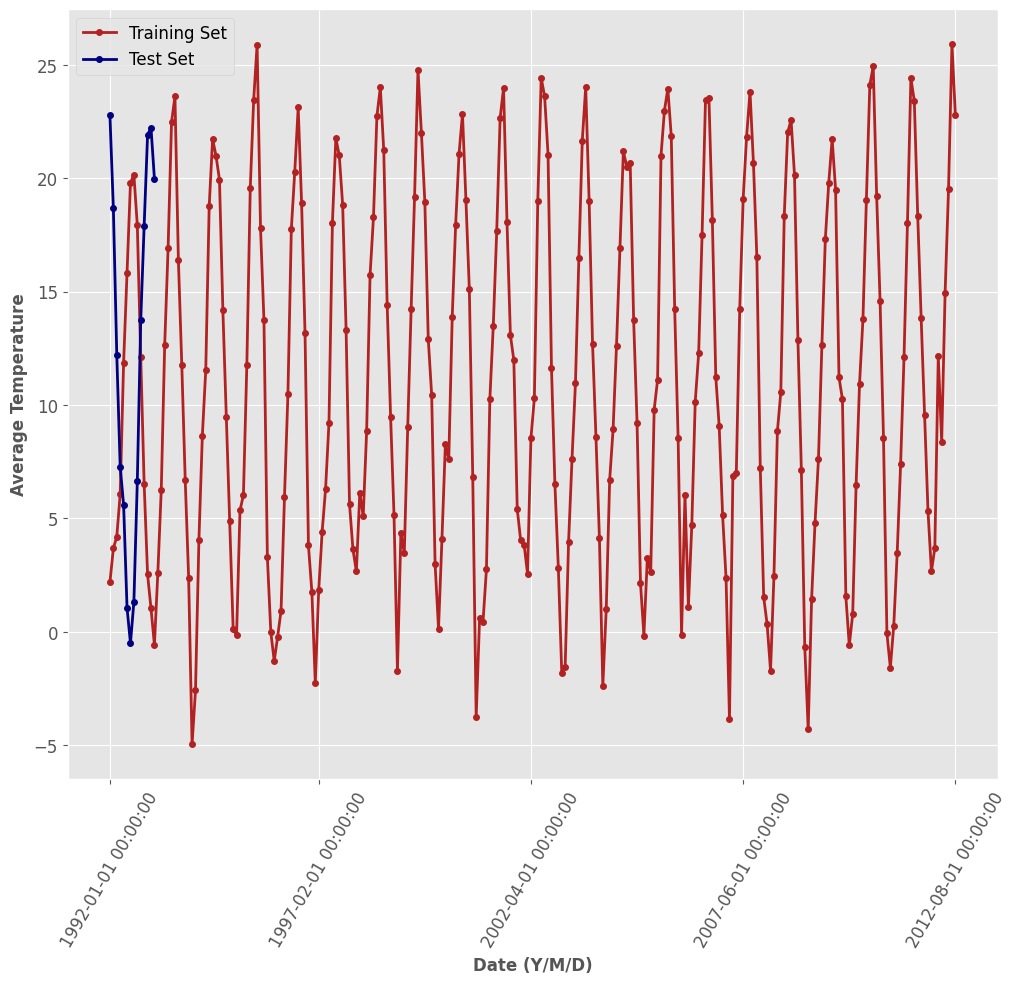

In [56]:
plot_from_data(series,date,label='Training Set')
plot_from_data(test_series,test_date,'navy',with_ticks=False,label='Test Set')
plt.legend()

In [57]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """

    results = []

    for order in tqdm_notebook(order_list):
        #try:
        model = SARIMAX(exog, order=order).fit(disp=-1)
    #except:
    #        continue

        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [58]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)

result_d_0 = optimize_ARIMA(order_list, exog = series)


<ipython-input-57-2d64bf4bbe1e>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

In [59]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(4, 0, 6)",1097.333480
1,"(4, 0, 5)",1098.088886
2,"(5, 0, 6)",1098.094928
3,"(3, 0, 5)",1098.118585
4,"(7, 0, 8)",1098.172593


In [60]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)

result_d_1 = optimize_ARIMA(order_list, exog = series)

result_d_1

<ipython-input-57-2d64bf4bbe1e>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning

,"(p, d, q)",AIC
0,"(2, 1, 5)",1085.631699
1,"(2, 1, 6)",1089.793160
2,"(3, 1, 5)",1090.048234
3,"(8, 1, 9)",1090.558399
4,"(9, 1, 9)",1091.198077
...,...,...
95,"(1, 1, 1)",1404.131932
96,"(1, 1, 2)",1405.247742
97,"(0, 1, 1)",1428.962023
98,"(0, 1, 3)",1430.945723


In [61]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(2, 1, 5)",1085.631699
1,"(2, 1, 6)",1089.793160
2,"(3, 1, 5)",1090.048234
3,"(8, 1, 9)",1090.558399
4,"(9, 1, 9)",1091.198077


In [62]:
final_result = result_d_0.append(result_d_1)

<ipython-input-62-0ac942e54fd1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_result = result_d_0.append(result_d_1)


In [63]:
best_models = final_result.sort_values(by='AIC', ascending=True).reset_index(drop=True).head()

In [64]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [65]:
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order=best_model_params_1).fit()
print(best_model_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  248
Model:               SARIMAX(2, 1, 5)   Log Likelihood                -534.816
Date:                Sat, 02 Mar 2024   AIC                           1085.632
Time:                        13:45:42   BIC                           1113.707
Sample:                             0   HQIC                          1096.935
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7319      0.000   3485.974      0.000       1.731       1.733
ar.L2         -1.0000      0.000  -8978.680      0.000      -1.000      -1.000
ma.L1         -2.4540      0.864     -2.840      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


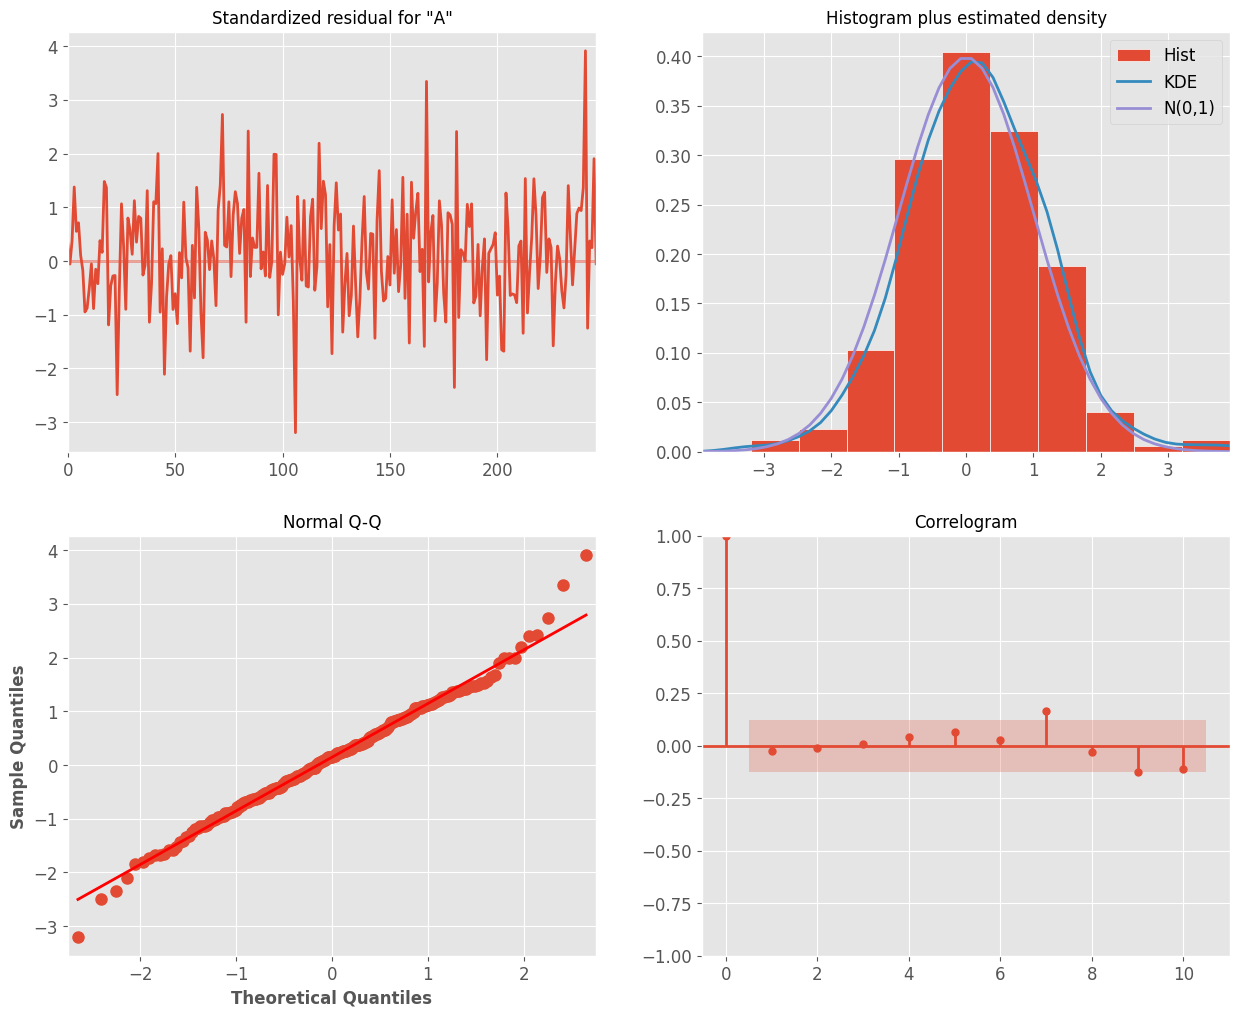

In [66]:
best_model_0.plot_diagnostics(figsize=(15,12))
plt.show()

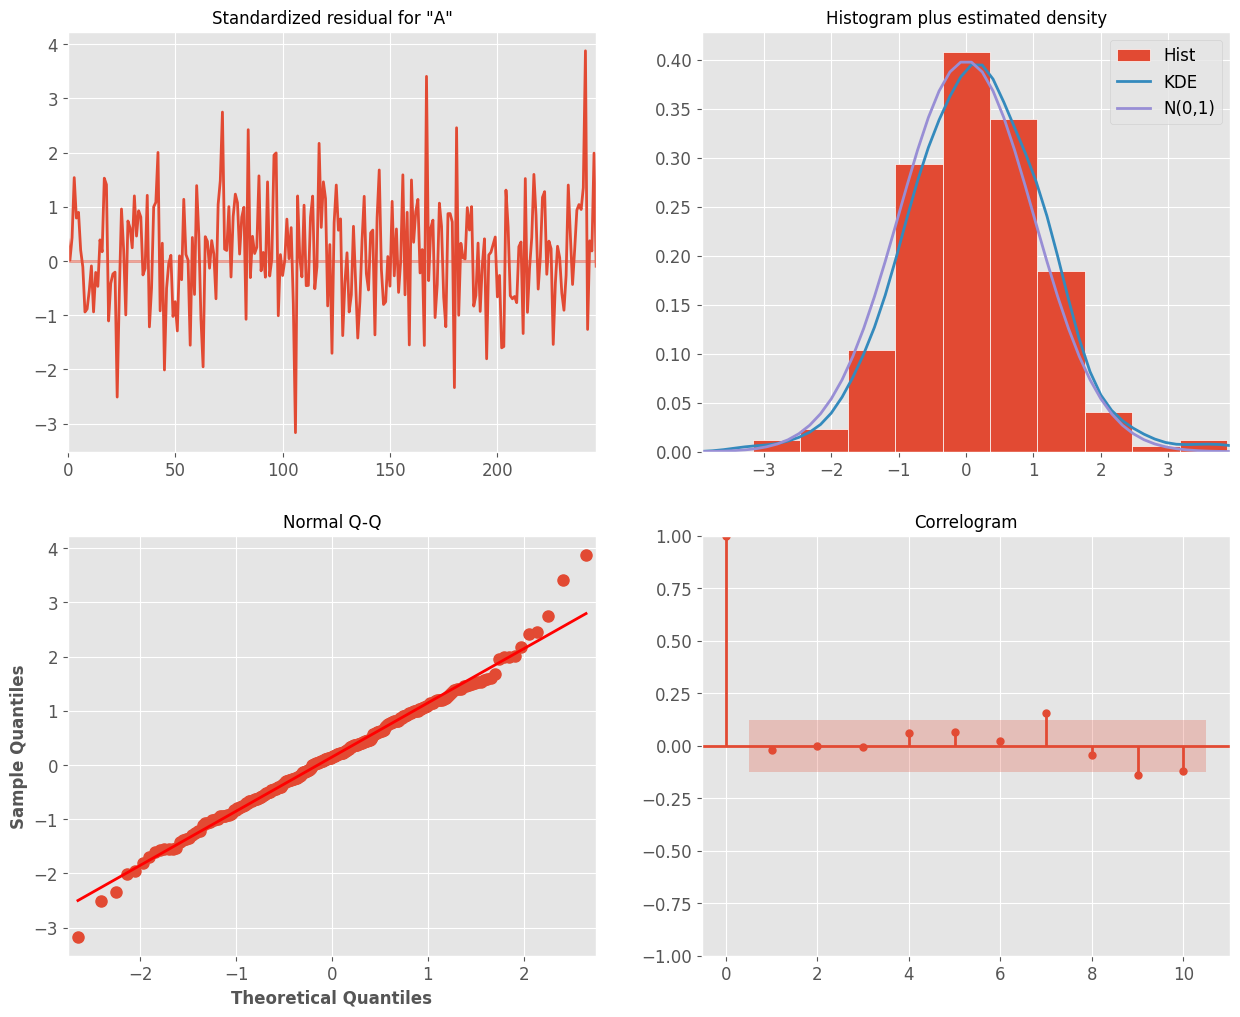

In [67]:
best_model_1.plot_diagnostics(figsize=(15,12))
plt.show()

In [70]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start=training_size, end=training_size+fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05)

s_forecast = best_model_1.get_prediction(start=training_size, end=training_size+fore_l)
s_forec = s_forecast.predicted_mean
s_ci = forecast.conf_int(alpha=0.05)

In [71]:
error_test=chicago_data.loc[test_date[1:].index.tolist()].AverageTemperatureUncertainty
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]

In [72]:
lower_test = test_set-error_test
upper_test = test_set+error_test

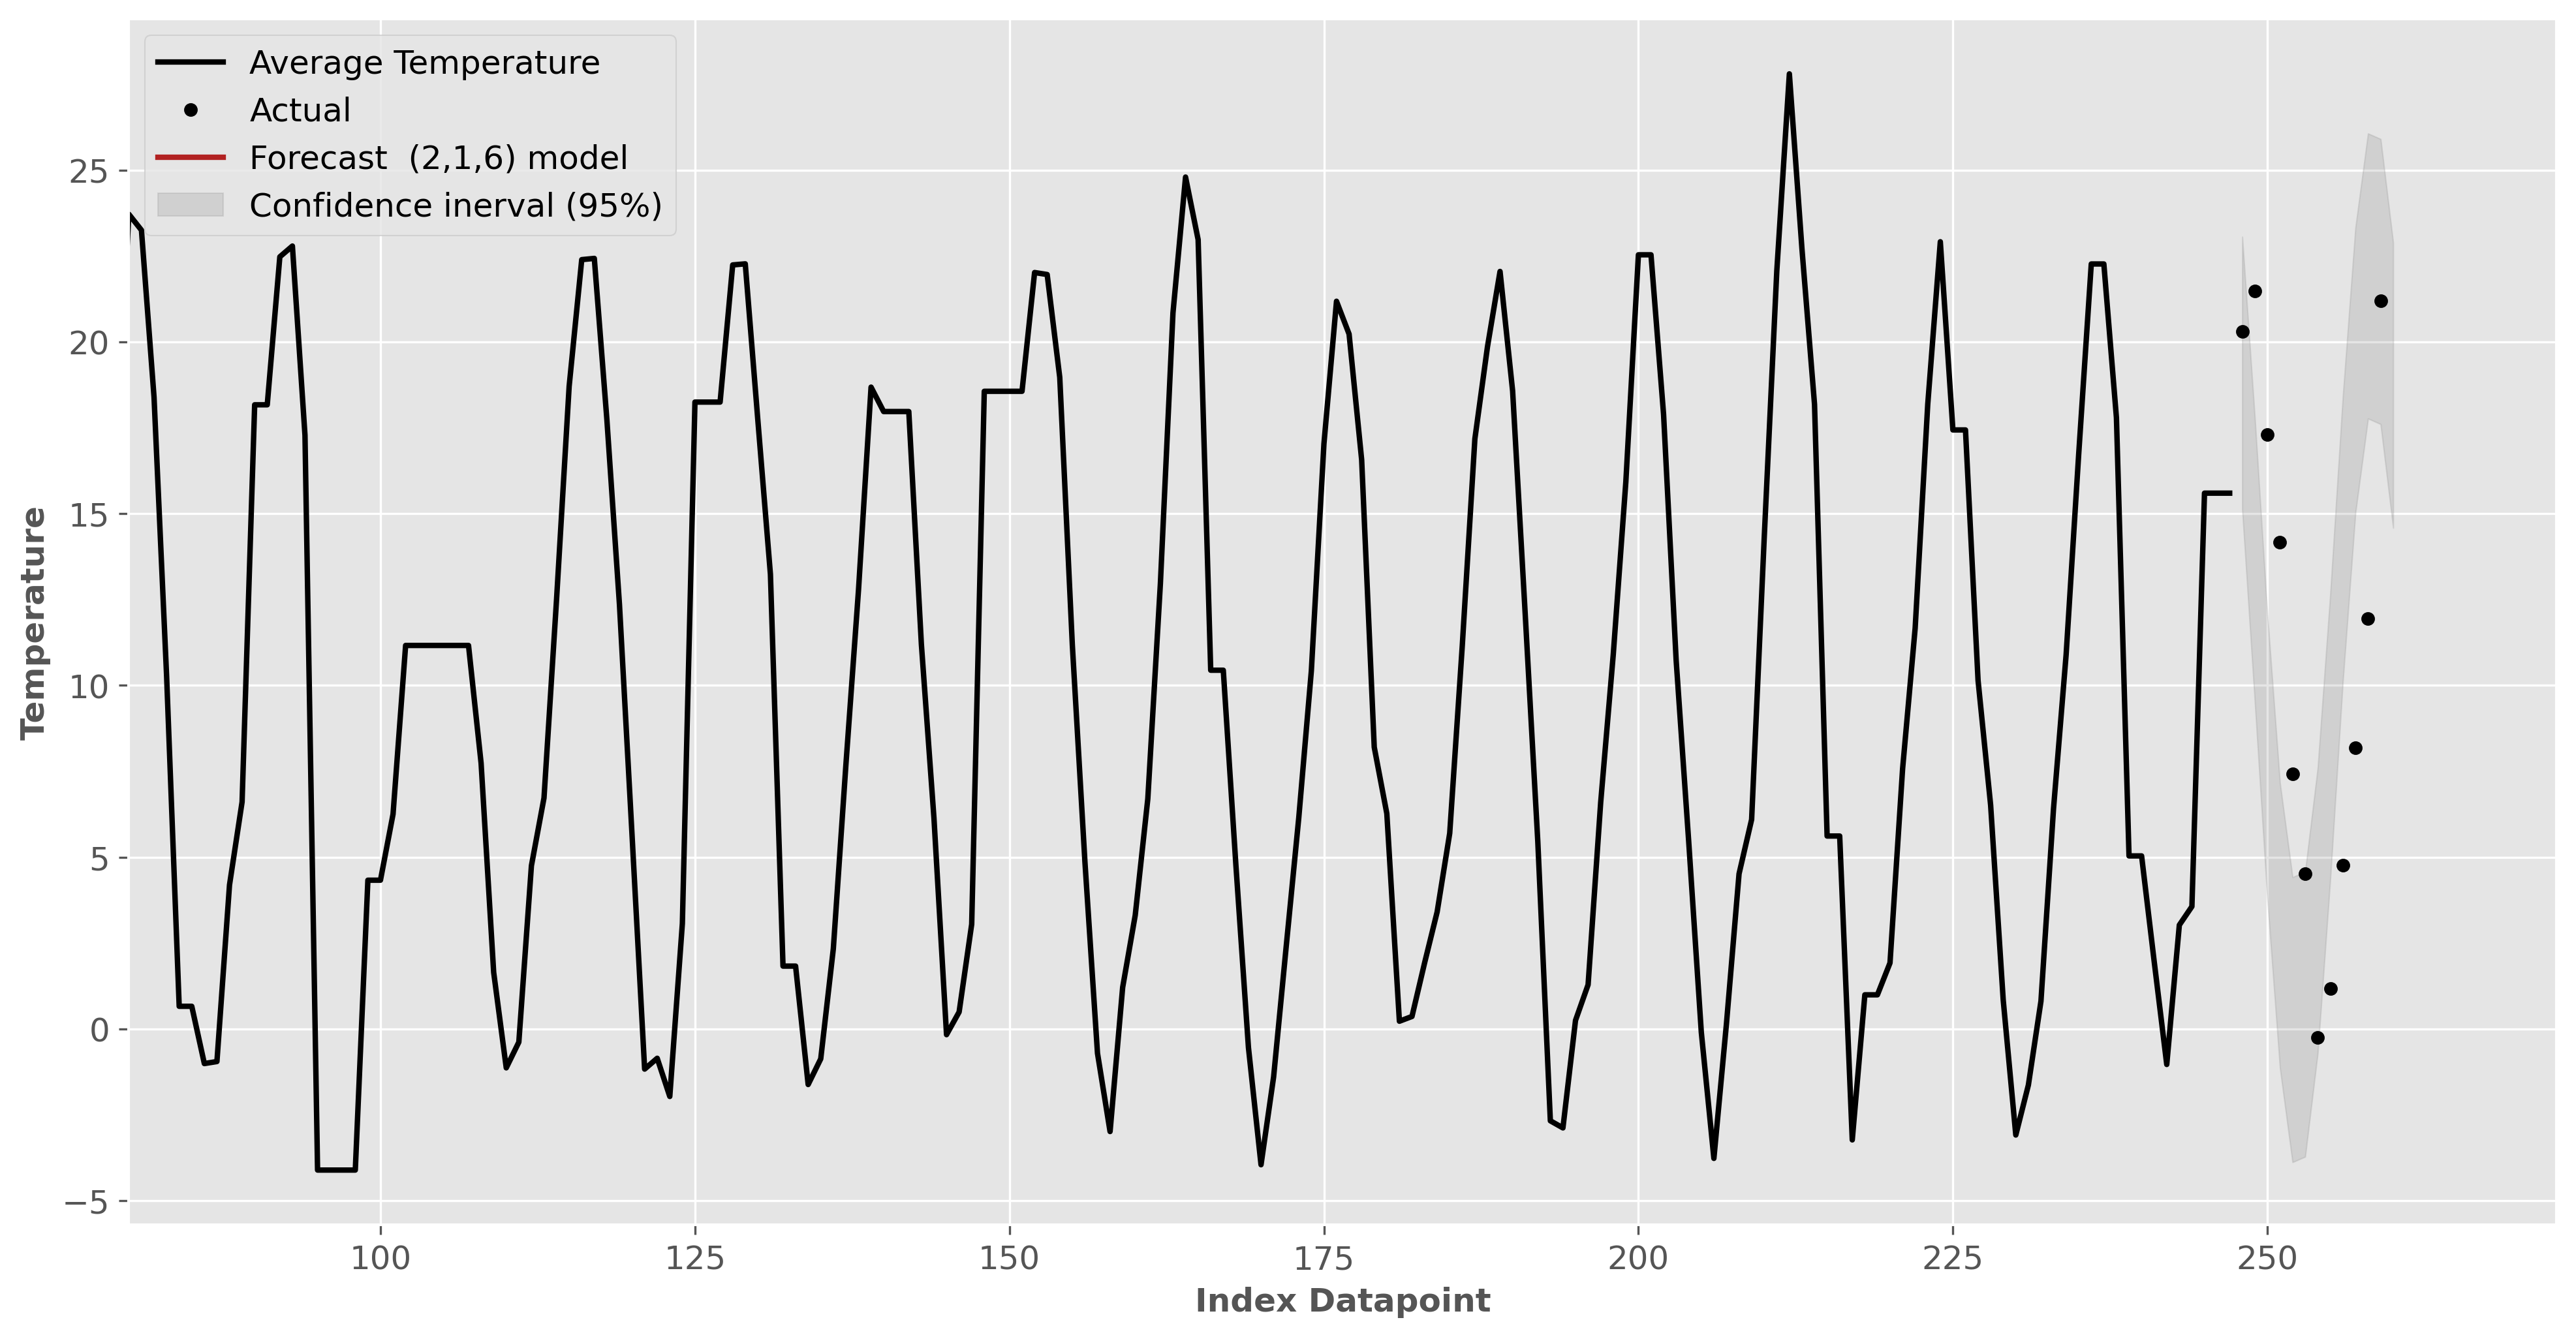

In [73]:
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = chicago_data.AverageTemperature.index[0:training_size]
x1=chicago_data.AverageTemperature.index[training_size:training_size+fore_l+1]
#ax.fill_between(forec, ci['lower Load'], ci['upper Load'])
plt.plot(x0, chicago_data.AverageTemperature[0:training_size],'k', label = 'Average Temperature')

plt.plot(chicago_data.AverageTemperature[training_size:training_size+fore_l], '.k', label = 'Actual')

forec = pd.DataFrame(forec, columns=['f'], index = x1)
#forec.f.plot(ax=ax,color = 'Darkorange',label = 'Forecast (d = 2)')
#ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')

s_forec = pd.DataFrame(s_forec, columns=['f'], index = x1)
s_forec.f.plot(ax=ax,color = 'firebrick',label = 'Forecast  (2,1,6) model')
ax.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')


plt.legend(loc = 'upper left')
plt.xlim(80,)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

Text(0, 0.5, 'Temperature')

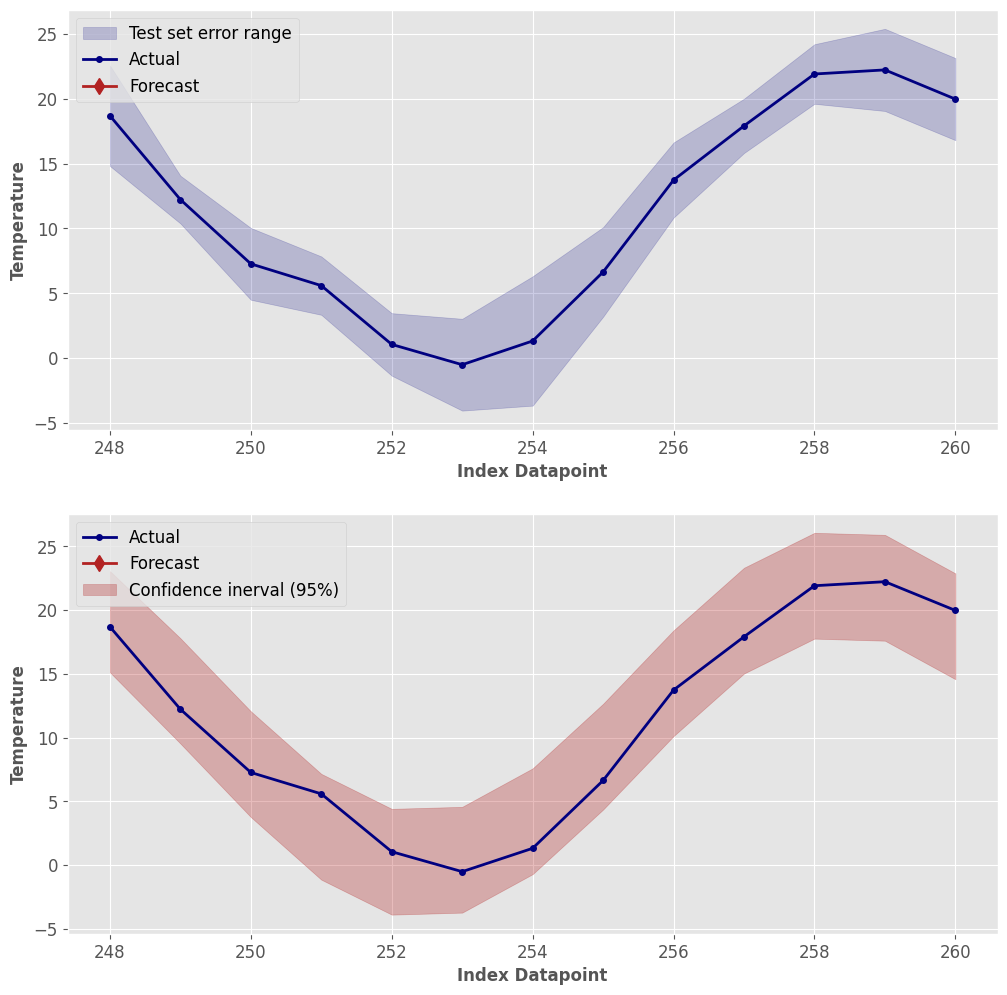

In [74]:
#plt.plot(forec)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plt.plot(test_set,marker='.',label="Actual",color='navy')
plt.plot(forec,marker='d',label="Forecast",color='firebrick')
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
#plt.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
plt.subplot(2,1,2)
#plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plt.plot(test_set,marker='.',label="Actual",color='navy')
plt.plot(s_forec,marker='d',label="Forecast",color='firebrick')
plt.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')

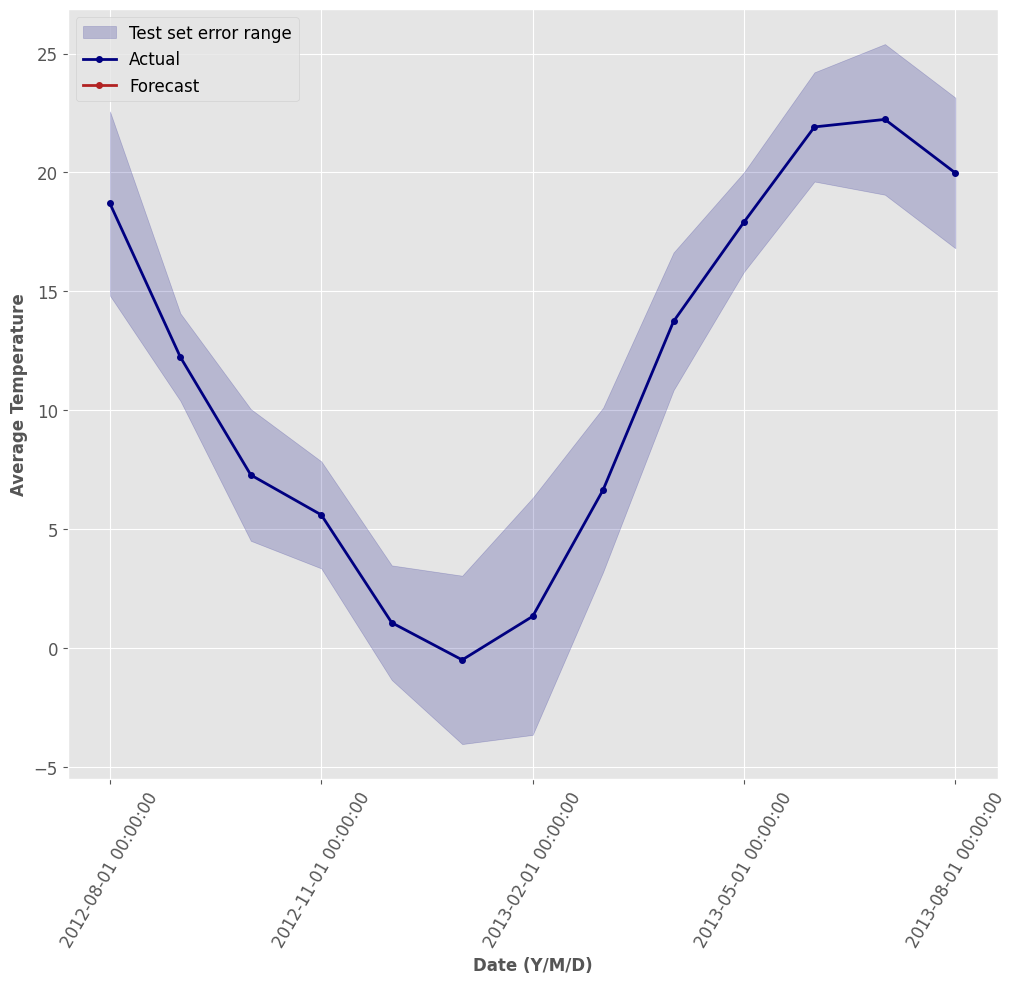

In [75]:
plt.fill_between(np.arange(0,len(test_set),1), lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plot_from_data(test_set,test_date,c='navy',label='Actual')
plot_from_data(forec['f'],test_date,c='firebrick',label='Forecast')
plt.legend(loc=2)